In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import altair as alt
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
df = pd.read_csv('cleaned_survey_results_2019.csv')

In [3]:
df = df.reset_index()

In [5]:
df.head()

index  \
0      0   
1      1   
2      2   
3      3   
4      4   

  Have you studied data visualization in school (or other formal environment) or did you learn how to do it on your own?  \
0                 Equal Parts School and Self-Taught                                                                       
1                                 Mostly Self-Taught                                                                       
2                 Equal Parts School and Self-Taught                                                                       
3                                 Mostly Self-Taught                                                                       
4                                 Mostly Self-Taught                                                                       

  What methods do you think best teach data visualization?  \
0  Workshops, Collaboration with more skilled pra...         
1  Workshops, Video Tutorials, Collaboration with...         
2  Examples, Video Tutorials, Working through a p...         
3                Examples, Working through a project         
4                Examples, Working through a project         

  What area is your next priority for improving your data visualization skills?  \
0  Improving my skills with an existing technical...                              
1           Learning a new technical tool or library                              
2                           Improving my data skills                              
3                           Improving my data skills                              
4                           Improving my data skills                              

  Are you a freelancer/consultant?  \
0                               No   
1                               No   
2                               No   
3                              Yes   
4                              Yes   

      What focus is data visualization in your work?  \
0  Data visualization is an important secondary p...   
1          Data visualization is the focus of my job   
2  Data visualization is one of several other thi...   
3  Data visualization is an important secondary p...   
4  Data visualization is an important secondary p...   

  For the majority of your projects: were you hired to do data visualization only or is data visualization a part of your job/project description?  \
0          Data visualization is only part of my job                                                                                                 
1          Data visualization is only part of my job                                                                                                 
2          Data visualization is only part of my job                                                                                                 
3          Data visualization is only part of my job                                                                                                 
4          Data visualization is only part of my job                                                                                                 

  Do you do more or less data visualization than you expected for this role?  \
0          About as much as I expected for this role                           
1                                               Less                           
2                                               Less                           
3          About as much as I expected for this role                           
4          About as much as I expected for this role                           

  Which one of these is the closest to describing your role?  \
0                                           Academic           
1            Leadership (Manager, Director, VP, etc)           
2            Leadership (Manager, Director, VP, etc)           
3            Leadership (Manager, Director, VP, etc)           
4            Leadership (Manager, Director, V

In [74]:
len(df.columns)

51

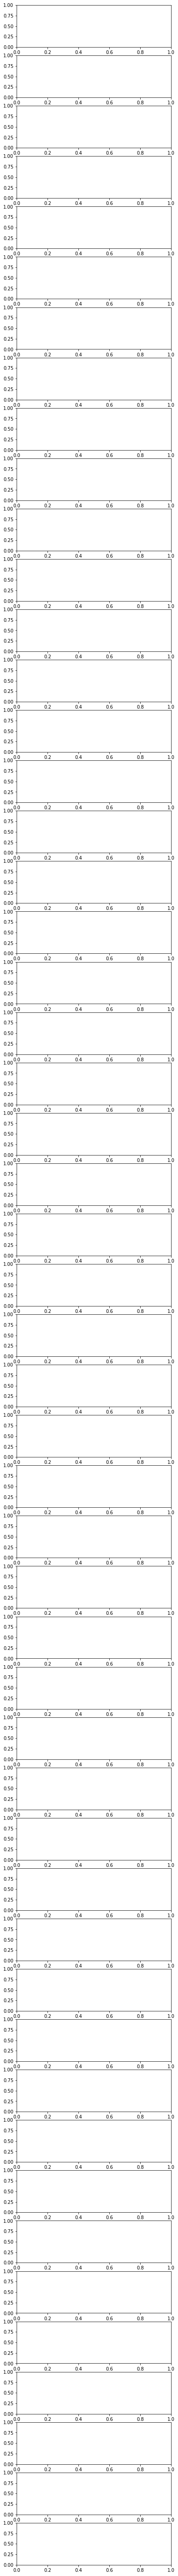

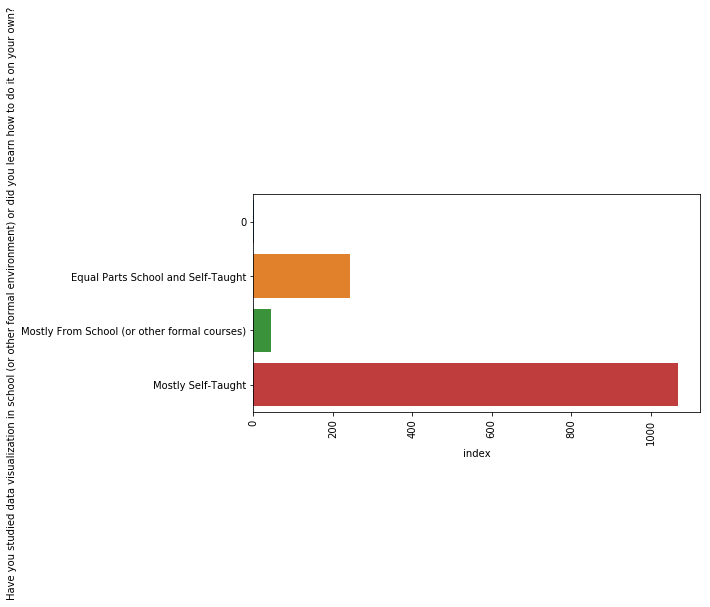

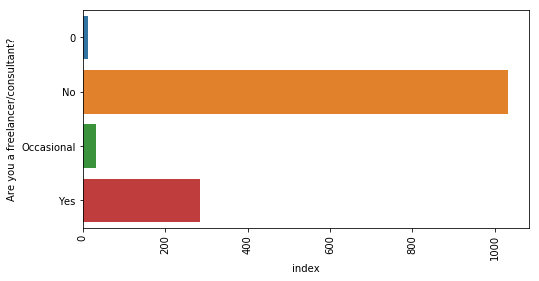

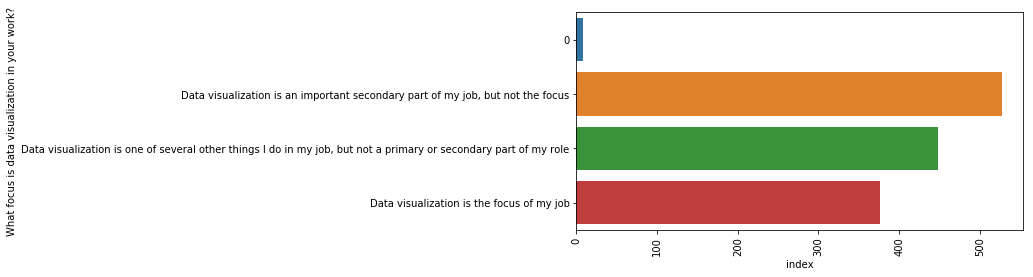

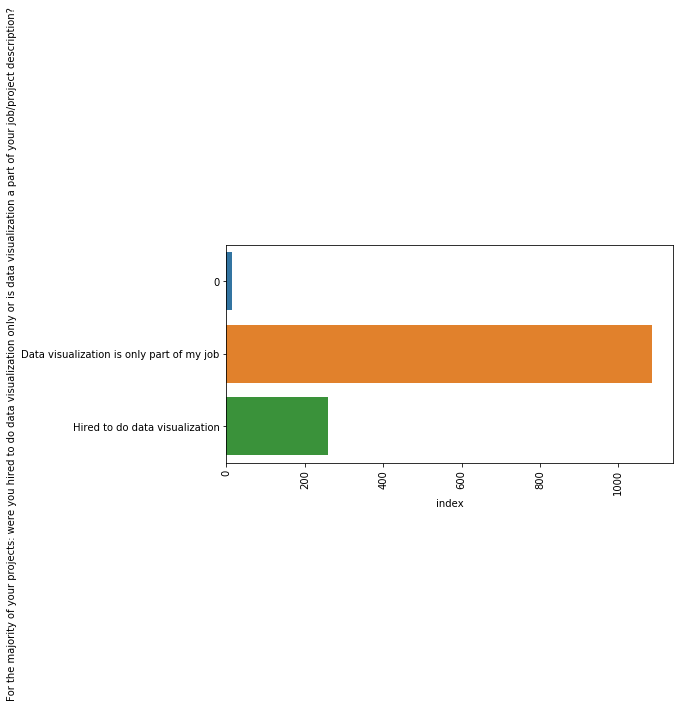

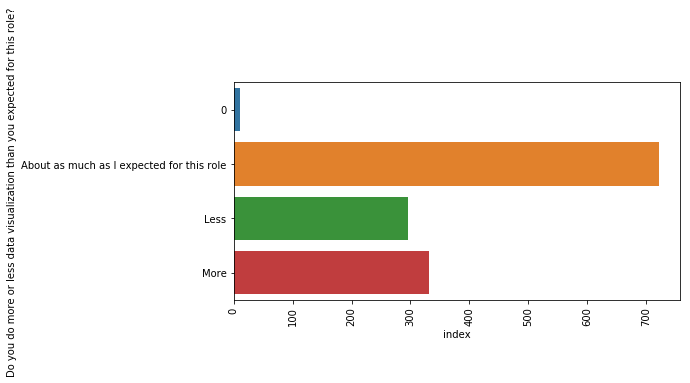

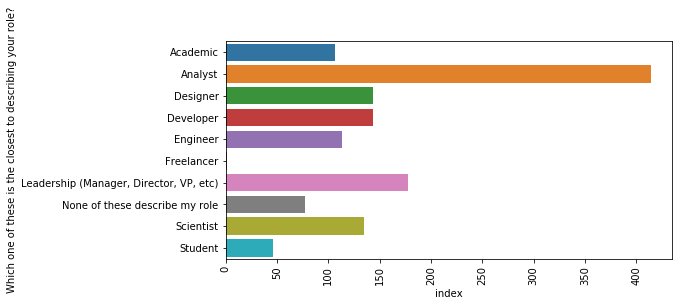

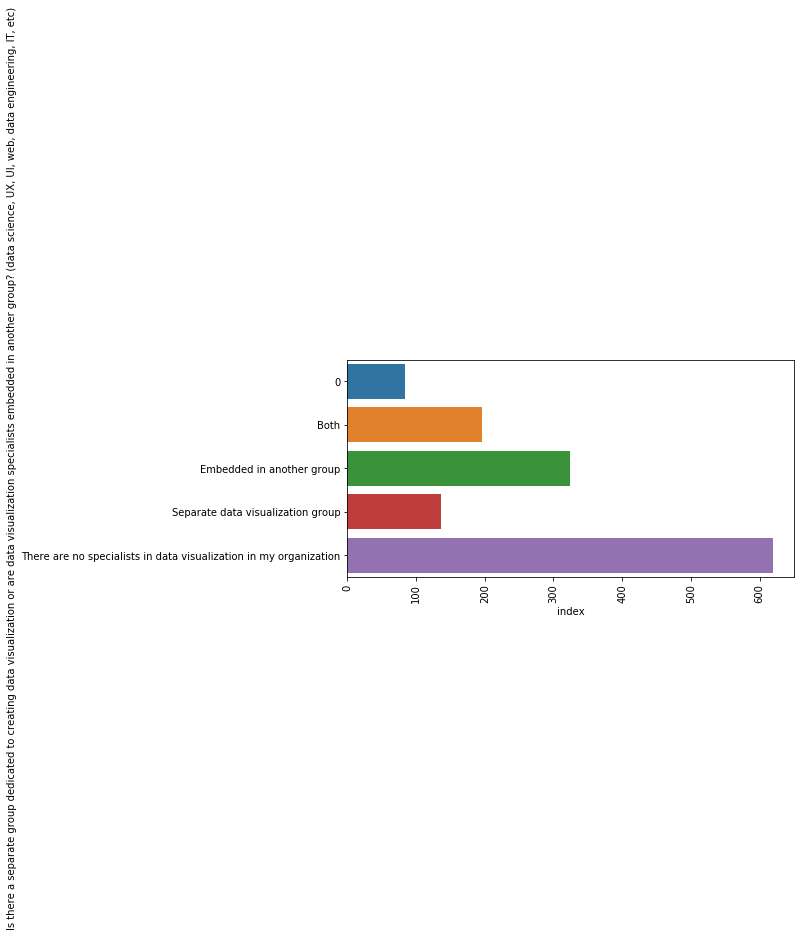

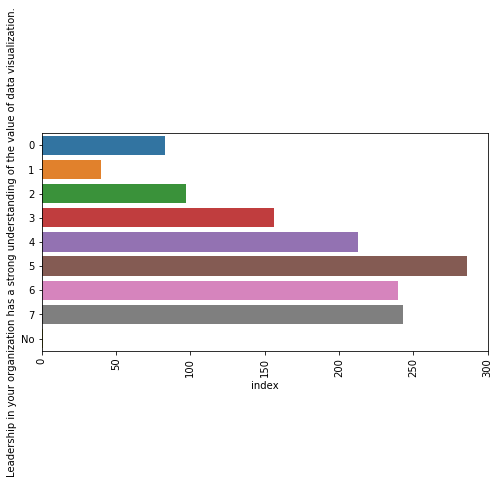

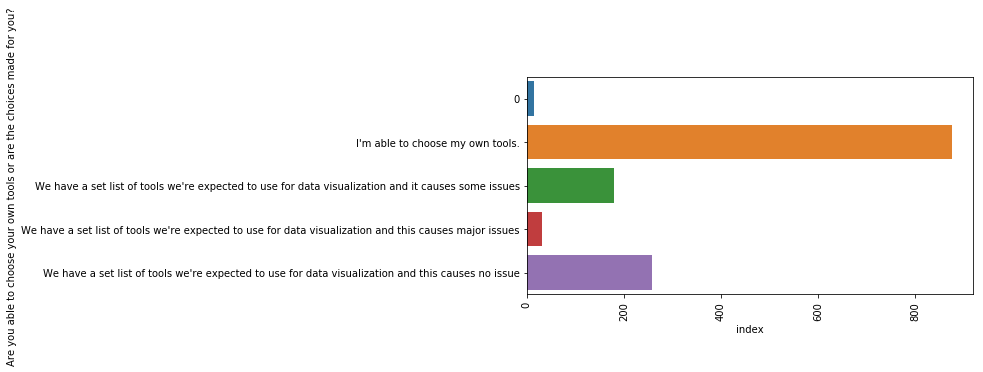

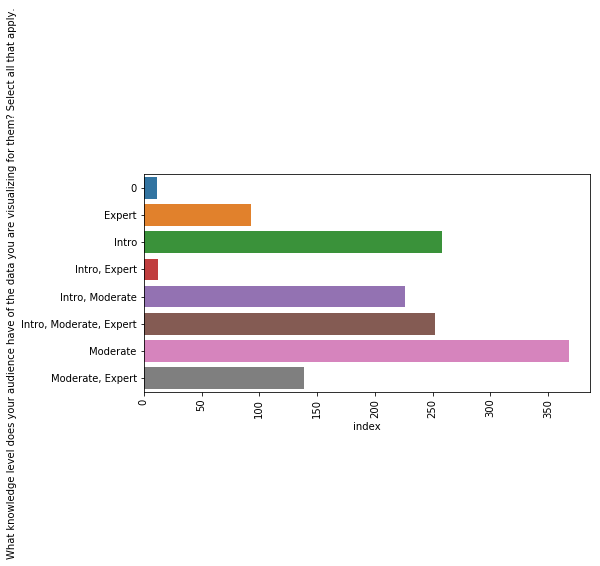

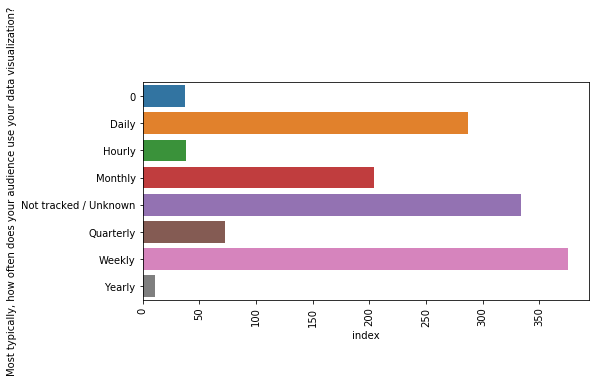

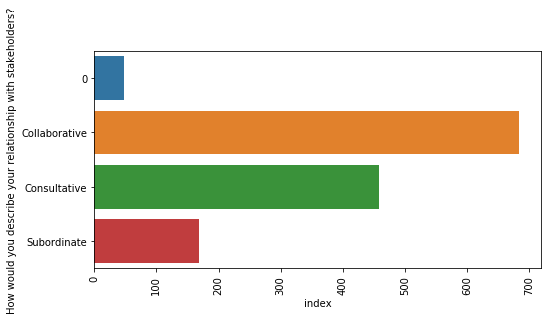

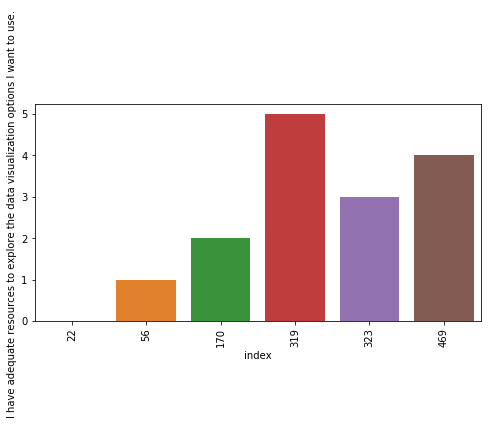

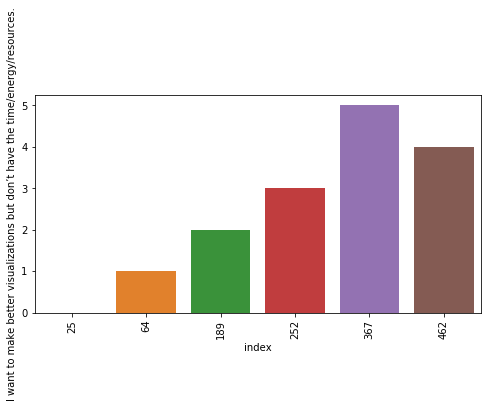

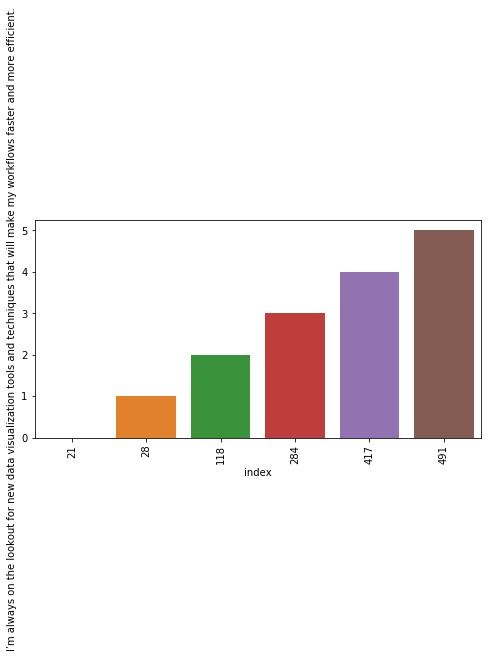

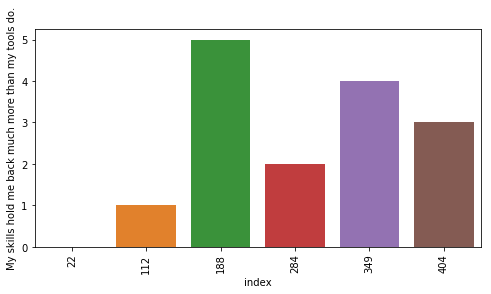

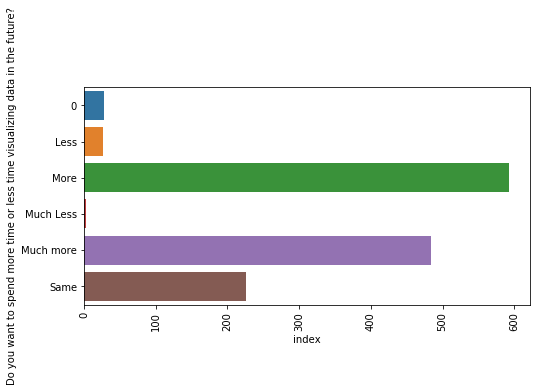

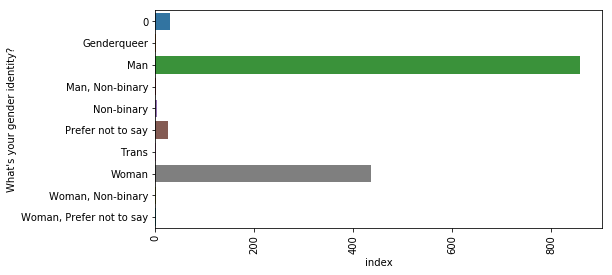

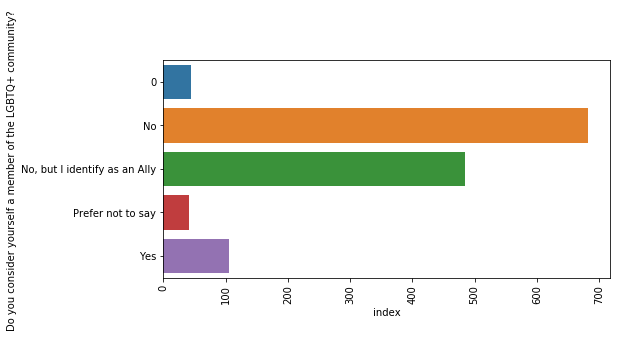

In [84]:
n=51
fig,ax = plt.subplots(n,1, figsize=(6,n*2))

test = df.iloc[:, 0:n]
for i,col in enumerate(test.columns[1:]):
    grouped = pd.DataFrame(test.groupby(col)['index'].count()).reset_index()
    if(len(grouped))<=10:
        plt.sca(ax[i])
        plt.figure(figsize=(8, 4))
        plt.xticks(rotation=90)
        chart = sns.barplot(y=col, x='index', data=grouped)

In [75]:
df = df.fillna(0)

In [86]:
sub_data = df[df['What country do you live in?'].isin(['USA', 'United Kingdom', 'Canada', 'India', 'Germany'])]

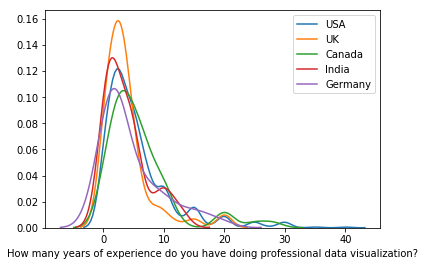

In [65]:
usa = df[df['What country do you live in?'] == 'USA']
uk = df[df['What country do you live in?'] == 'United Kingdom']
canada = df[df['What country do you live in?'] == 'Canada']
india = df[df['What country do you live in?'] == 'India']
germany = df[df['What country do you live in?'] == 'Germany']
sns.distplot(usa['How many years of experience do you have doing professional data visualization?'], hist=False, rug=False, label="USA")
sns.distplot(uk['How many years of experience do you have doing professional data visualization?'], hist=False, rug=False, label="UK")
sns.distplot(canada['How many years of experience do you have doing professional data visualization?'], hist=False, rug=False, label="Canada")
sns.distplot(india['How many years of experience do you have doing professional data visualization?'], hist=False, rug=False, label="India")
sns.distplot(germany['How many years of experience do you have doing professional data visualization?'], hist=False, rug=False, label="Germany")
plt.legend();

In [19]:
df['How many years of experience do you have doing professional data visualization?'] = df['How many years of experience do you have doing professional data visualization?'].replace(0.1, 0)
df['How many years of experience do you have doing professional data visualization?'] = df['How many years of experience do you have doing professional data visualization?'].replace(0.166, 0)
df['How many years of experience do you have doing professional data visualization?'] = df['How many years of experience do you have doing professional data visualization?'].replace(0.3, 0.5)
df['How many years of experience do you have doing professional data visualization?'] = df['How many years of experience do you have doing professional data visualization?'].replace(0.4, 0.5)

In [ ]:
df.to_csv('')

In [13]:
df['How many years of experience do you have doing professional data visualization?'].isnull().sum()

104

In [10]:
pd.DataFrame(df['How many years of experience do you have doing professional data visualization?']\
    .value_counts()).reset_index().sort_values('index', ascending=True)\
    .rename(columns={'How many years of experience do you have doing professional data visualization?':  "count", "index": "year"})


year  count
9    0.000     41
36   0.100      1
25   0.166      1
35   0.300      1
26   0.400      1
14   0.500     12
3    1.000    136
13   1.500     15
0    2.000    188
21   2.500      5
1    3.000    182
4    4.000    111
2    5.000    148
6    6.000     77
24   6.500      2
7    7.000     58
30   7.500      1
8    8.000     44
16   9.000     10
5   10.000     81
17  11.000      9
12  12.000     17
18  13.000      8
19  14.000      7
10  15.000     40
34  16.000      1
22  17.000      2
27  18.000      1
23  19.000      2
11  20.000     29
37  24.000      1
15  25.000     11
28  27.000      1
33  28.000      1
32  29.000      1
20  30.000      7
31  35.000      1
29  40.000      1

In [93]:
pd.DataFrame(sub_data.groupby(['What country do you live in?', \
                  'For the majority of your projects: were you hired to do data visualization only or is data visualization a part of your job/project description?'])['index'].count())

index
What country do you live in? For the majority of your projects: were you hir...       
Canada                       Data visualization is only part of my job              50
                             Hired to do data visualization                         12
Germany                      0                                                       1
                             Data visualization is only part of my job              26
                             Hired to do data visualization                          5
India                        Data visualization is only part of my job              34
                             Hired to do data visualization                          5
USA                          0                                                       6
                             Data visualization is only part of my job             535
                             Hired to do data visualization                        128
United Kingdom               0                                                       1
                             Data visualization is only part of my job              70
                             Hired to do data visualization                         25

In [94]:
pd.DataFrame(sub_data.groupby(['What country do you live in?', \
                  'What focus is data visualization in your work?'])['index'].count())

index
What country do you live in? What focus is data visualization in your work?           
Canada                       Data visualization is an important secondary pa...     23
                             Data visualization is one of several other thin...     22
                             Data visualization is the focus of my job              17
Germany                      Data visualization is an important secondary pa...     13
                             Data visualization is one of several other thin...      8
                             Data visualization is the focus of my job              11
India                        Data visualization is an important secondary pa...     15
                             Data visualization is one of several other thin...     12
                             Data visualization is the focus of my job              12
USA                          0                                                       4
                             Data visualization is an important secondary pa...    261
                             Data visualization is one of several other thin...    228
                             Data visualization is the focus of my job             176
United Kingdom               0                                                       1
                             Data visualization is an important secondary pa...     35
                             Data visualization is one of several other thin...     27
                             Data visualization is the focus of my job              33

In [98]:
pd.DataFrame(sub_data.groupby(['What country do you live in?', \
                  'Have you studied data visualization in school (or other formal environment) or did you learn how to do it on your own?'])['index'].count())

index
What country do you live in? Have you studied data visualization in school (...       
Canada                       Equal Parts School and Self-Taught                     13
                             Mostly From School (or other formal courses)            2
                             Mostly Self-Taught                                     47
Germany                      Equal Parts School and Self-Taught                      1
                             Mostly From School (or other formal courses)            3
                             Mostly Self-Taught                                     28
India                        Equal Parts School and Self-Taught                      7
                             Mostly From School (or other formal courses)            1
                             Mostly Self-Taught                                     31
USA                          Equal Parts School and Self-Taught                    135
                             Mostly From School (or other formal courses)           29
                             Mostly Self-Taught                                    505
United Kingdom               Equal Parts School and Self-Taught                     17
                             Mostly Self-Taught                                     79

In [101]:
pd.DataFrame(sub_data.groupby(['What country do you live in?', \
                  'What focus is data visualization in your work?'])['index'].count())

index
What country do you live in? What focus is data visualization in your work?           
Canada                       Data visualization is an important secondary pa...     23
                             Data visualization is one of several other thin...     22
                             Data visualization is the focus of my job              17
Germany                      Data visualization is an important secondary pa...     13
                             Data visualization is one of several other thin...      8
                             Data visualization is the focus of my job              11
India                        Data visualization is an important secondary pa...     15
                             Data visualization is one of several other thin...     12
                             Data visualization is the focus of my job              12
USA                          0                                                       4
                             Data visualization is an important secondary pa...    261
                             Data visualization is one of several other thin...    228
                             Data visualization is the focus of my job             176
United Kingdom               0                                                       1
                             Data visualization is an important secondary pa...     35
                             Data visualization is one of several other thin...     27
                             Data visualization is the focus of my job              33

In [89]:
sub_data


index  \
0         0   
2         2   
3         3   
4         4   
5         5   
6         6   
8         8   
9         9   
10       10   
11       11   
12       12   
14       14   
16       16   
17       17   
18       18   
19       19   
21       21   
23       23   
24       24   
26       26   
27       27   
28       28   
29       29   
31       31   
32       32   
35       35   
36       36   
37       37   
38       38   
39       39   
...     ...   
1299   1299   
1301   1301   
1302   1302   
1303   1303   
1304   1304   
1305   1305   
1306   1306   
1307   1307   
1308   1308   
1309   1309   
1310   1310   
1312   1312   
1313   1313   
1314   1314   
1316   1316   
1317   1317   
1318   1318   
1319   1319   
1322   1322   
1324   1324   
1325   1325   
1326   1326   
1327   1327   
1329   1329   
1331   1331   
1334   1334   
1340   1340   
1341   1341   
1350   1350   
1356   1356   

     Have you studied data visualization in school (or other formal environment) or did you learn how to do it on your own?  \
0                    Equal Parts School and Self-Taught                                                                       
2                    Equal Parts School and Self-Taught                                                                       
3                                    Mostly Self-Taught                                                                       
4                                    Mostly Self-Taught                                                                       
5                                    Mostly Self-Taught                                                                       
6                                    Mostly Self-Taught                                                                       
8                    Equal Parts School and Self-Taught                                                                       
9                                    Mostly Self-Taught                                                                       
10                                   Mostly Self-Taught                                                                       
11                                   Mostly Self-Taught                                                                       
12                   Equal Parts School and Self-Taught                                                                       
14                                   Mostly Self-Taught                                                                       
16                   Equal Parts School and Self-Taught                                                                       
17         Mostly From School (or other formal courses)                                                                       
18                                   Mostly Self-Taught                                                                       
19                                   Mostly Self-Taught                                                                       
21                   Equal Parts School and Self-Taught                                                                       
23                   Equal Parts School and Self-Taught                                                                       
24                                   Mostly Self-Taught                                                                       
26                                   Mostly Self-Taught                                                                       
27         Mostly From School (or other formal courses)                                                                       
28                                   Mostly Self-Taught                                                                       
29                                   Mostly Self-Taught                                                                       
31                         

In [ ]:
alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)